### Using and understanding probit models - Exercises & Answers

The exercises for this week will ease you into the slightly odd world of probit models. In many ways the logic is the same - we fit the models and interpret the predictions - but since the predictions are probabilities, and a threshold has to be imposed to actually recover a binary outcome, things can be a little trickier. On the whole, these models are a little trickier to understand than a standard GLM, so take care.

## 1. **Iceberg**, right ahead!
Our probit regression practice begins by examining the `titanic` dataset. This is a genuine dataset that records the full passenger log of the Titanic, with many interesting variables, including whether a passenger survived the disaster or not. 

### a. Imports
To get started, import the following packages with their usual aliases: `pandas`, `pingouin`, `statsmodels.formula.api`, `seaborn`, `marginaleffects`, and `numpy`.

In [1]:
# Your answer here
import pandas as pd
import pingouin as pg
import statsmodels.formula.api as smf
import seaborn as sns
import marginaleffects as me
import numpy as np

sns.set_style('whitegrid')

### b. Loading up data
Load the Titanic dataset from the following link using `pandas` into a variable called `titanic`, then show the top 10 rows. 

Data: https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Titanic.csv

The dataset is fairly self explanatory, but you can find a more detailed description here:
https://vincentarelbundock.github.io/Rdatasets/doc/Stat2Data/Titanic.html

In [2]:
# Your answer here
titanic = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Titanic.csv')
titanic.head(10)


,rownames,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
5,6,"Anderson, Mr Harry",1st,47.00,male,1,0
6,7,"Andrews, Miss Kornelia Theodosia",1st,63.00,female,1,1
7,8,"Andrews, Mr Thomas, jr",1st,39.00,male,0,0
8,9,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.00,female,1,1
9,10,"Artagaveytia, Mr Ramon",1st,71.00,male,0,0


### c. A tiny bit of cleaning
The dataset has a missing data value for one of the `PClass` entries, where it is recorded as a * symbol. 

Remove this by querying the data so that `PClass` is not equal to '*', and reassign this back to the variable `titanic`. 

Then, drop the missing values in the `Age` column, and reassign this back to the variable `titanic`.

In [3]:
# Your answer here
titanic = titanic.query('PClass != "*"').dropna(how='any', subset='Age')

### d. Estimating survival probabilities
The sinking of the Titanic is one of the worst maritime disasters in recorded history, with over 1500 deaths. The dataset contains only the passenger manifesto (i.e., crew are not included). Surviving the disaster was not equally likely for all passengers, however - the phrase 'women and children first' may come to mind.

Probit regression can help us estimate survival probabilities for the different passenger classes, ages, and sex. 

Fit a probit model predicted whether a passenger survived from their sex, age, and class, and print the summary:

In [4]:
# Your answer here
titanic_model = smf.probit('Survived ~ PClass + Age + Sex', data=titanic).fit()
titanic_model.summary()

Optimization terminated successfully.
         Current function value: 0.461503
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  756
Model:                         Probit   Df Residuals:                      751
Method:                           MLE   Df Model:                            4
Date:                Wed, 28 Aug 2024   Pseudo R-squ.:                  0.3196
Time:                        14:57:41   Log-Likelihood:                -348.90
converged:                       True   LL-Null:                       -512.79
Covariance Type:            nonrobust   LLR p-value:                 1.098e-69
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.1643      0.217      9.967      0.000       1.739       2.590
PClass[T.2nd]    -0.7540      0.152     -4.966      0.000      -1.052      -0.456
PClass[T.3rd]    -1.4076      0.150     -9.356      0.000      -1.702      -1.113
Sex[T.male]      -1.5460      0.112    -13.821      0.000      -1.765      -1.327
Age              -0.0221      0.004     -5.130      0.000      -0.031      -0.014
=================================================================================
"""

All of the coefficients are significant, but again, we do not want to dwell on interpreting these. Instead, we should focus on the predictions. Generate a set of predictions for each predictor, to see how survival probability is affected. Bonus points if you can plot them as well.

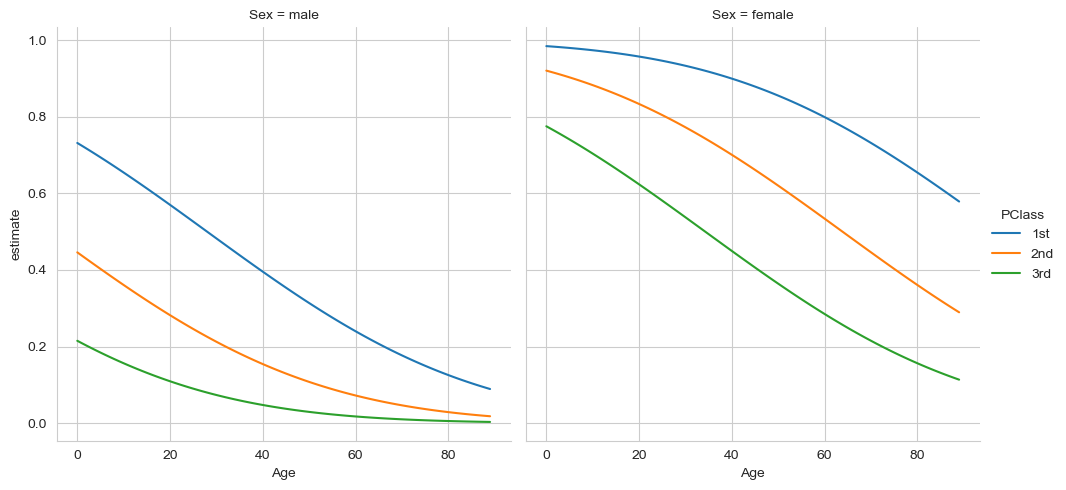

In [5]:
# Your answer here
dg = me.datagrid(titanic_model,
                 PClass=['1st', '2nd', '3rd'],
                 Sex=['male', 'female'],
                 Age=np.arange(0, 90))

# Predict
preds = me.predictions(titanic_model, newdata=dg)

# Plot
sns.relplot(data=preds,
            x='Age', y='estimate',
            hue='PClass', col='Sex',
            kind='line')

This story is not apparent at all from the coefficients. Younger individuals had a higher chance of survival, as did women, which is particularly pronounced for higher-class passengers. 

Let's check the importance of these differences. 

Use `marginaleffects` to contrast the differences in survival probability for females and males, regardless of class and age (i.e., the marginal effect of sex).

In [6]:
# Your code here
# marginal effects here
display(
    me.predictions(titanic_model,
               newdata=dg,
               by=['Sex'])
)

# Contrast here
me.predictions(titanic_model,
               newdata=dg,
               by=['Sex'],
               hypothesis='pairwise')

Sex,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,f64,f64,f64,f64,f64,f64,f64
"""female""",0.637297,0.034537,18.452395,0.0,inf,0.569605,0.704989
"""male""",0.202482,0.015936,12.706124,0.0,inf,0.171248,0.233715


term,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,f64,f64,f64,f64,f64,f64,f64
"""Row 1 - Row 2""",0.434815,0.037036,11.740354,0.0,inf,0.362226,0.507404


What about the marginal effects of passenger class? What are the probabilities of survival for those in each of the three classes, and do they differ significantly from one another?

In [7]:
# Your code here
display(
    me.predictions(titanic_model,
                   newdata=dg,
                   by=['PClass'])
)

# Contrast here
me.predictions(titanic_model,
               newdata=dg,
               by=['PClass'],
               hypothesis='pairwise')

PClass,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,f64,f64,f64,f64,f64,f64,f64
"""1st""",0.61146,0.02734,22.364725,0.0,inf,0.557874,0.665046
"""2nd""",0.405421,0.032443,12.496293,0.0,inf,0.341833,0.469009
"""3rd""",0.242787,0.024009,10.11215,0.0,inf,0.195729,0.289845


term,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,f64,f64,f64,f64,f64,f64,f64
"""Row 1 - Row 2""",0.206039,0.0389,5.296636,1.1796e-7,23.015252,0.129797,0.282282
"""Row 1 - Row 3""",0.368673,0.032987,11.176456,0.0,inf,0.304021,0.433326
"""Row 2 - Row 3""",0.162634,0.033226,4.894787,9.8412e-7,19.954661,0.097512,0.227756


What about the marginal slope of age? How did probability of survival change with a 1-year increase in age, regardless of passenger sex and class? Hint - since you have just one variable of interest here, you should use `avg_slopes` rather than `slopes`, which will helpfully average across the results for you. 

In [8]:
# Your answer here
me.avg_slopes(titanic_model, newdata=dg, variables='Age')

term,contrast,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,str,f64,f64,f64,f64,f64,f64,f64
"""Age""","""mean(dY/dX)""",-0.005577,0.00087,-6.40739,1.4803e-10,32.653374,-0.007283,-0.003871


### e. Individualised survival estimates

Based on your model, who was more likely to survive the Titanic disaster out of the following three people:
1. A 10 year old female from the second class
2. A 30 year old male from first class
3. A 60 year old female from first class
4. A 1 year old male from third class

Hint - you may find using `datagrid` gives you more than what you need here, so you could specify your `newdata` through a simple DataFrame. Try it and see. Once you obtain the four predictions, you can use a different argument to `hypothesis` - try using 'reference' to see if you can compare all predictions to that of a 10 year old second class female.

In [9]:
# Your answer here
# Option 1 - create a dataframe
dg = pd.DataFrame({'Age': [10, 30, 60, 1],
                   'Sex': ['female', 'male', 'female', 'male'],
                   'PClass': ['2nd', '1st', '1st', '3rd']})

# Predict
opt1 = me.predictions(titanic_model, newdata=dg)
display(opt1)

# Opt1 contrast
display(me.predictions(titanic_model, newdata=dg, hypothesis='reference'))

rowid,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high,Age,Sex,PClass
i32,f64,f64,f64,f64,f64,f64,f64,i64,str,str
0,0.882865,0.028276,31.222681,0.0,inf,0.827444,0.938286,10,"""female""","""2nd"""
1,0.482342,0.044893,10.74414,0.0,inf,0.394352,0.570331,30,"""male""","""1st"""
2,0.799332,0.041966,19.046915,0.0,inf,0.717079,0.881585,60,"""female""","""1st"""
3,0.208569,0.039494,5.280984,1.2849e-7,22.891818,0.131161,0.285976,1,"""male""","""3rd"""


term,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,f64,f64,f64,f64,f64,f64,f64
"""Row 2 - Row 1""",-0.400524,0.051269,-7.812249,5.5511e-15,47.356144,-0.501008,-0.300039
"""Row 3 - Row 1""",-0.083533,0.051703,-1.615623,0.106176,3.235471,-0.18487,0.017804
"""Row 4 - Row 1""",-0.674296,0.043832,-15.383747,0.0,inf,-0.760205,-0.588388


### f. Evaluating the model
Compute the phi coefficient for the model examine its magnitude. How good is this (higher is better)?

In [10]:
# Your answer here
# Get predictions for all datapoints
preds = me.predictions(titanic_model)

# Binarise
binary = np.digitize(preds['estimate'], [.5])

# Correlate
pg.corr(binary, titanic['Survived'])

,n,r,CI95%,p-val,BF10,power
pearson,756,0.557665,"[0.51, 0.6]",5.325949e-63,3.067e+59,1.0


## 2. The Challenger Disaster
Probit regression is really morbid, isn't it? Lets continue with another example.

The Challenger was a space shuttle that exploded shortly after launch in 1986, killing all seven astronauts on board. The cause of the explosion was traced back to a simple mechanical fault in the form of a rubber O-ring in the fuselage. In normal temperatures, these O-rings kept extremely powerful and flammable rocket fuel from the booster, allowing the fuel to enter when needed. In low temperatures, they became brittle, allowing fuel to leak into the booster in greater quantities. 

What is very tragic about this example is that the data was there to suggest it all along - engineers had stated that the O-rings failed in low temperatures, but those in charge of the operation pressed forward with the launch date.

The recorded engineer data can be downloaded here: https://vincentarelbundock.github.io/Rdatasets/csv/openintro/orings.csv

And a short description is here:
https://vincentarelbundock.github.io/Rdatasets/doc/openintro/orings.html

Read in the dataset into a dataframe called `oring` and display it.

In [11]:
# Your answer here
oring = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/openintro/orings.csv')
oring

,rownames,mission,temperature,damaged,undamaged
0,1,1,53,5,1
1,2,2,57,1,5
2,3,3,58,1,5
3,4,4,63,1,5
4,5,5,66,0,6
5,6,6,67,0,6
6,7,7,67,0,6
7,8,8,67,0,6
8,9,9,68,0,6
9,10,10,69,0,6


There are two columns of interest here. The first is `temperature`, displaying the temperature on the day of the test flight, and `damaged`, which records the number (out of six) of the damaged O-rings. Before we fit a model, create a new column in the dataframe called `any_damage` which should have a 1 where there is 1 or more in the `damaged` column, and a zero elsewhere. You already know the function that will do this.

In [12]:
# Your answer here
oring['any_damage'] = np.digitize(oring['damaged'], [1])

Once you have done that, fit a simple probit model that predicts `any_damage` from `temperature`. Show the summary.

In [13]:
# Your answer here
oring_model = smf.probit('any_damage ~ temperature', data=oring).fit()
oring_model.summary()

Optimization terminated successfully.
         Current function value: 0.442994
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:             any_damage   No. Observations:                   23
Model:                         Probit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 Aug 2024   Pseudo R-squ.:                  0.2791
Time:                        14:57:41   Log-Likelihood:                -10.189
converged:                       True   LL-Null:                       -14.134
Covariance Type:            nonrobust   LLR p-value:                  0.004972
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.7750      4.029      2.178      0.029       0.879      16.671
temperature    -0.1351      0.058     -2.314      0.021      -0.250      -0.021
===============================================================================
"""

Notice that this is a very small dataset, and the coefficient for temperature is not particularly fairly weak. Compute the phi coefficient for this model.

In [14]:
# Your answer here
# Get predictions for all datapoints
preds = me.predictions(oring_model)

# Binarise
binary = np.digitize(preds['estimate'], [.5])

# Correlate
pg.corr(binary, oring['any_damage'])

,n,r,CI95%,p-val,BF10,power
pearson,23,0.693688,"[0.39, 0.86]",0.000242,144.722,0.973117


Plot the predictions of the model, showing how probability of damage changes with temperature.

<Axes: xlabel='temperature', ylabel='estimate'>

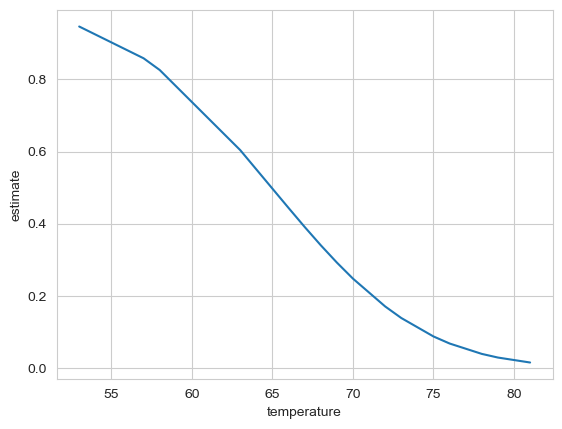

In [15]:
# Your answer here
# Get predictions
preds = me.predictions(oring_model)

sns.lineplot(data=preds,
             x='temperature', y='estimate')

On the morning of the disaster, when the shuttle launched, the temperature was 36 degrees Fahrenheit.

What probability does the model give for any kind of O-ring damage for this event?

In [16]:
# Your answer here
me.predictions(oring_model, newdata=me.datagrid(oring_model, temperature=36))

temperature,rowid,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high,rownames,mission,damaged,undamaged,any_damage
i64,i32,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64
36,0,0.999954,0.000368,2713.616681,0.0,inf,0.999232,1.000676,20,16,0,6,0


## 3. Marginally significant meta-scientific statistics
Effects are either statistically significant, or they are not. Historically, researchers in psychology would refer to hypothesis tests that are just above the .05 threshold as 'marginally significant', a practice that is heavily frowned upon these days in light of the replication crisis. 

In 2016, [Pritschet, Powell, & Horne, 2016](https://journals.sagepub.com/doi/10.1177/0956797616645672) carried out an analysis of just over 1,500 articles in three different areas of psychology (social, cognitive, and developmental), over the past four decades, and examined whether articles used the term 'marginally significant'. This interesting dataset allows us to essentially examine a cultural trend in psychological science in terms of the language used. 

For this exercise, we will fit a probit regression to this data and examine the probability of this phrase appearing over time and in different fields. First, you will need to do some data detective work - follow the link above to the paper, and then head to the OSF page linked in the paper. There, you'll find an Excel file titled `marginals psych science revision_corrections.xlsx`. Download this and then place it in the same folder as this notebook. Read it in using `pandas`, which has a `.read_excel` function, and show the top 10 rows. 

In [17]:
# Your answer here
marginals = pd.read_excel('marginals psych science revision_corrections.xlsx')

The first thing we need to do is rename some columns, as we can't work *easily* with these column names. 

Create a dictionary that has the keys 'Number of Experiments' and 'Marginals Yes/No' (the existing column names) and the values 'n_exps' and 'marginal_yes' (the new names). Call it `newcols`, then use the `.rename` method on your dataframe to alter the column names. Make sure to overwrite the dataframe so the names actually stick! You may need to refer to Week 1's content to figure this out.

In [18]:
# Your answer here
newcols = {'Number of Experiments': 'n_exps', 'Marginals Yes/No': 'marginal_yes'}
marginals = marginals.rename(columns=newcols)

Next, we need to replace the values in the `Field` column so they are no longer numbers but represent the actual fields (this makes it easier for us to interpret the outcome, but it is not fully required). You can again make a dictionary that has the numbers 1, 2, and 3 to the values 'Cognitive', 'Developmental', and 'Social'. Then you can use the `.replace` method to recode the values in the `Field` column. Again, reassign the dataframe so the changes stick!

In [19]:
# Your answer here
newfields = {1: 'Cognitive', 2: 'Developmental', 3: 'Social'}
marginals = marginals.replace({'Field': newfields})

Now filter the data so that the number of experiments is 1 or more (there are some papers that don't have any statistics, e.g. commentaries). Again, reassign the dataframe. As a final step, just take the columns `marginal_yes`, `Year`, `Field`, and `n_exps` out to use.

In [20]:
# Your answer here
marginals = marginals.query('n_exps > 0')
marginals = marginals[['marginal_yes', 'Year', 'Field', 'n_exps']]

Now fit a probit regression to this data that predicts whether a paper contains the phrase 'marginally significant' from Year, Field, and number of experiments. This examines whether different fields use the phrase at different rates, whether it has changed over time, and whether papers with more studies are more likely to use it. Call it `marginal_mod`, and print the summary.

In [21]:
# Your answer here
marginal_mod = smf.probit('marginal_yes ~ Year + Field + n_exps', data=marginals).fit()
marginal_mod.summary()

Optimization terminated successfully.
         Current function value: 0.597290
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:           marginal_yes   No. Observations:                 1469
Model:                         Probit   Df Residuals:                     1464
Method:                           MLE   Df Model:                            4
Date:                Wed, 28 Aug 2024   Pseudo R-squ.:                 0.07556
Time:                        14:57:42   Log-Likelihood:                -877.42
converged:                       True   LL-Null:                       -949.13
Covariance Type:            nonrobust   LLR p-value:                 5.202e-30
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -40.1238      5.205     -7.709      0.000     -50.325     -29.923
Field[T.Developmental]    -0.0067      0.162     -0.041      0.967      -0.323       0.310
Field[T.Social]            0.3672      0.151      2.426      0.015       0.071       0.664
Year                       0.0197      0.003      7.525      0.000       0.015       0.025
n_exps                     0.1164      0.027      4.303      0.000       0.063       0.169
==========================================================================================
"""

Generate a set of predictions for this data. This is a little tricky but `numpy` can help. You will need:
- Each of the fields
- Years from 1970 to 2010 (DO NOT TYPE EACH NUMBER OUT INDIVIDUALLY!)
- The number of experiments, from 1 to 10 (these are what are observed in the data).

Create a datagrid and generate these predictions.

In [22]:
# Your answer here
dg = me.datagrid(marginal_mod,
                 Year=np.arange(1970, 2011),
                 n_exps=np.arange(1, 11),
                 Field=['Cognitive', 'Developmental', 'Social'])

Plot these predictions. It should have year on the X axis, the probability of the phrase on the Y, separate lines for the number of experiments, and separate plots for each field (use `relplot`). Can you add a reference line to the plot at .5?

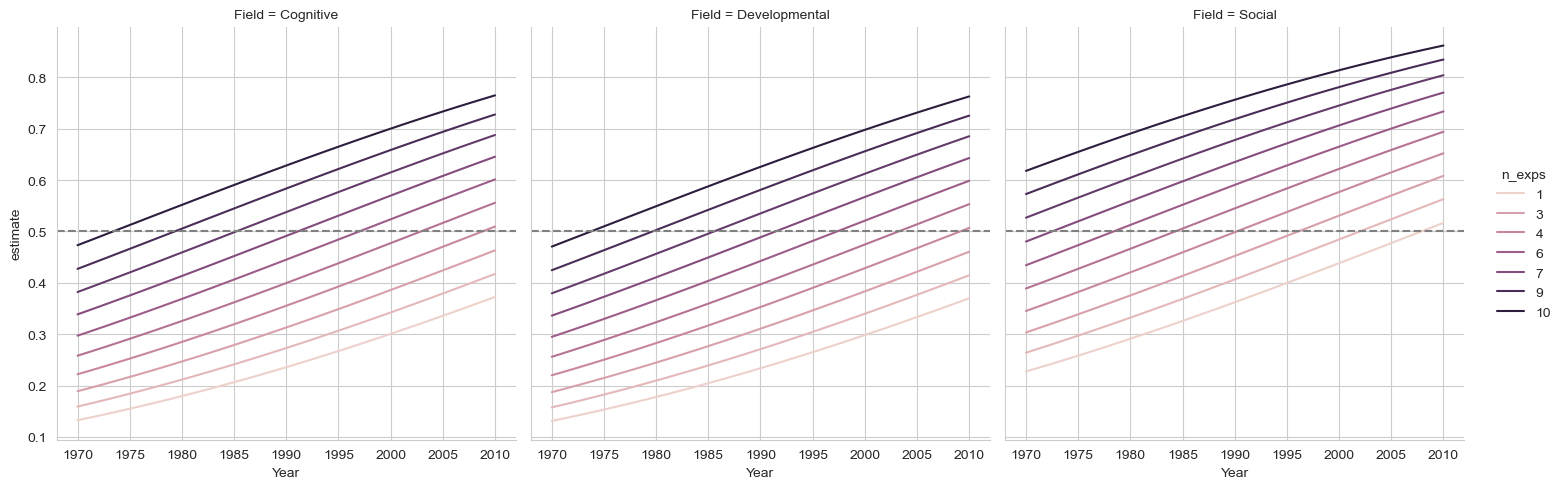

In [23]:
# Your answer here
preds = me.predictions(marginal_mod, newdata=dg)

# Plot
sns.relplot(data=preds,
            x='Year', y='estimate',
            hue='n_exps', col='Field',
            kind='line').refline(y=.5)

Using your datagrid, or by developing one you might need, test the following hypotheses:

1. Regardless of time or number of experiments, which field is most guilty of using the phrase?

In [24]:
# Your answer here
me.predictions(marginal_mod, 
               newdata=dg,
               by=['Field'])

Field,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,f64,f64,f64,f64,f64,f64,f64
"""Cognitive""",0.42801,0.05757,7.434588,1.0481e-13,43.117357,0.315174,0.540845
"""Developmental""",0.425579,0.047817,8.900135,0.0,inf,0.331859,0.519299
"""Social""",0.562763,0.035215,15.980838,0.0,inf,0.493743,0.631782


2. In 2010, what number of experiments in social psychology led to the highest probability of using the phrase? At which point was the highest value statistically significant from others (you can use the 'sequential' argument to `hypothesis` for this!)

In [25]:
# Your answer here
me.predictions(marginal_mod,
               newdata=me.datagrid(marginal_mod, 
                                   Year=2010, 
                                   Field='Social', 
                                   n_exps=np.arange(1, 11)),
               hypothesis='sequential')

term,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,f64,f64,f64,f64,f64,f64,f64
"""Row 2 - Row 1""",0.046179,0.010886,4.242234,0.000022,15.463599,0.024844,0.067515
"""Row 3 - Row 2""",0.045337,0.010624,4.267511,0.00002,15.626575,0.024515,0.066159
"""Row 4 - Row 3""",0.043911,0.009966,4.406169,0.000011,16.536303,0.024379,0.063444
"""Row 5 - Row 4""",0.041959,0.008966,4.679607,0.000003,18.40838,0.024385,0.059533
"""Row 6 - Row 5""",0.039554,0.007702,5.135353,2.8161e-7,21.759773,0.024458,0.054651
"""Row 7 - Row 6""",0.036786,0.00627,5.867274,4.4302e-9,27.749991,0.024498,0.049075
"""Row 8 - Row 7""",0.033752,0.004781,7.059261,1.6740e-12,39.119843,0.024381,0.043123
"""Row 9 - Row 8""",0.030552,0.003378,9.044419,0.0,inf,0.023931,0.037172
"""Row 10 - Row 9""",0.027283,0.002284,11.944306,0.0,inf,0.022806,0.03176


3. For each field, what is the difference between the probability of use in 2010 and 2000, averaging over the number of experiments? You may need to run it a few times to compare each field.

In [26]:
# Your answer here
me.predictions(marginal_mod,
               newdata=me.datagrid(marginal_mod,
                                   Year=[2000, 2010],
                                   Field=['Cognitive', 'Developmental', 'Social'],
                                   n_exps=np.arange(1, 11)),
               by=['Year', 'Field'], # averages over experiments
               hypothesis='b1=b4' # e.g., for Cognitive, this is the comparison
              )

term,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,f64,f64,f64,f64,f64,f64,f64
"""b1=b4""",-0.074131,0.01057,-7.013193,2.3295e-12,38.643135,-0.094849,-0.053414


4. In developmental psychology, what combination of year and number of experiments has a probability *significantly* grater than .6 of using the phrase?

This is a very tricky one. You will need to specify the right data grid, and rather than specifying a string to `hypothesis`, you can pass
a float value. Then you will need to convert your output to pandas and filter it appropriately - this is difficult, but this is an extremely specific hypothesis.

Nevertheless, this is the kind of science you can do by leveraging linear models.

In [27]:
# Your answer here
# Get predictions
ps = me.predictions(marginal_mod,
                    newdata=me.datagrid(marginal_mod,
                                        Field='Developmental',
                                        Year=np.arange(1970, 2011),
                                        n_exps=np.arange(1, 11)),
                    hypothesis=.6)

# Now filter
ps.to_pandas().query('statistic > 0 and p_value < .05')

,Field,Year,n_exps,rowid,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high,marginal_yes
389,Developmental,2008,10,389,0.750526,0.073478,2.048579,0.040503,4.625816,0.606511,0.894540,0
399,Developmental,2009,10,399,0.756750,0.072383,2.165564,0.030345,5.042420,0.614882,0.898619,0
409,Developmental,2010,10,409,0.762890,0.071286,2.285035,0.022311,5.486114,0.623173,0.902607,0


5. Averaging across all years, for which combination of number of experiments and fields show a significantly-greater-than-.50 chance of using the phrase?

In [28]:
# Your answer here
# Get predictions
ps = me.predictions(marginal_mod,
                    newdata=me.datagrid(marginal_mod,
                                        Field='Social',
                                        Year=np.arange(1970, 2011),
                                        n_exps=np.arange(1, 11)),
                    by=['Field', 'n_exps'],
                    hypothesis=.5)

# Now filter
ps.to_pandas().query('statistic > 0 and p_value < .05')

,Field,n_exps,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
5,Social,6,0.588244,0.042696,2.066821,0.038751,4.689621,0.504562,0.671927
6,Social,7,0.631692,0.050721,2.596420,0.009420,6.730044,0.532281,0.731102
7,Social,8,0.673518,0.057668,3.008925,0.002622,8.575258,0.560491,0.786545
8,Social,9,0.713270,0.063214,3.373783,0.000741,10.397408,0.589373,0.837167
9,Social,10,0.750570,0.067164,3.730709,0.000191,12.354578,0.618931,0.882210


Social psychology papers with 6 or more studies are, across time, most likely to use the phrase!